In [76]:
import pandas as pd
from itertools import chain
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**COVID-19 World Vaccination Progress** 

Таблица `country_vaccinations.csv` содержит следующую информацию о вакцинации: 

*   `country`: страна
*   `iso_code`: ISO код страны
*   `date`: дата ввода данных
*   `total_vaccinations`: абсолютное количество прививок в стране
*   `people_vaccinated`: человек, в зависимости от схемы иммунизации, получит одну или несколько (обычно 2) вакцины
*   `people_fully_vaccinated`: количество людей, получивших полный набор прививок согласно схеме иммунизации (обычно 2)
*   `daily_vaccinations_raw`: количество вакцинаций на эту дату
*   `daily_vaccinations`: количество вакцинаций на эту дату
*   `total_vaccinations_per_hundred`: соотношение (в процентах) между количеством вакцинированных и общей численностью населения на текущий момент в стране
*   `people_vaccinated_per_hundred`: соотношение (в процентах) между иммунизированным населением и общей численностью населения на данный момент в стране

In [77]:
path = 'country_vaccinations.csv'
data_raw = pd.read_csv(path)

### Посмотрим на размер, вид и тип данных:

In [78]:
data_raw.shape

(2555, 15)

In [79]:
data_raw.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


In [80]:
data_raw.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
2550,Wales,NaN,2021-02-03,491786.0,490570.0,1216.0,28129.0,22149.0,15.60,15.56,0.04,7025.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2551,Wales,NaN,2021-02-04,524677.0,523042.0,1635.0,32891.0,23101.0,16.64,16.59,0.05,7327.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2552,Wales,NaN,2021-02-05,559468.0,556997.0,2471.0,34791.0,25788.0,17.74,17.67,0.08,8179.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2553,Wales,NaN,2021-02-06,592228.0,589622.0,2606.0,32760.0,26854.0,18.78,18.70,0.08,8517.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2554,Wales,NaN,2021-02-07,606768.0,603976.0,2792.0,14540.0,27089.0,19.24,19.16,0.09,8592.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [81]:
data_raw.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [82]:
for i in data_raw.columns:
   print('{0:50} {1}'.format(i,data_raw[i].dtype) )
   

country                                            object
iso_code                                           object
date                                               object
total_vaccinations                                 float64
people_vaccinated                                  float64
people_fully_vaccinated                            float64
daily_vaccinations_raw                             float64
daily_vaccinations                                 float64
total_vaccinations_per_hundred                     float64
people_vaccinated_per_hundred                      float64
people_fully_vaccinated_per_hundred                float64
daily_vaccinations_per_million                     float64
vaccines                                           object
source_name                                        object
source_website                                     object


### Заметим, что присутствует колонка с датами - приведем ее к datetime обьектам:

In [83]:
data_raw['date']=pd.to_datetime(data_raw['date'])

In [84]:
data_raw['date'].dtype

dtype('<M8[ns]')

### Удалим последние столбцы с источниками информации (они слишком специфичны для страны)

In [85]:
data_raw=data_raw.drop(columns=['source_website','source_name','iso_code'],axis=1)

### Посмотрим на основные статистики колонок с категориальными и числовыми данными

Преобразуем столбец "страна" из объектного типа в категориальный


In [86]:
data_raw['country']=data_raw['country'].astype('category')
data_raw['country'].dtype

CategoricalDtype(categories=['Algeria', 'Andorra', 'Argentina', 'Austria', 'Bahrain',
                  'Bangladesh', 'Belgium', 'Bermuda', 'Bolivia', 'Brazil',
                  'Bulgaria', 'Canada', 'Cayman Islands', 'Chile', 'China',
                  'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
                  'Ecuador', 'Egypt', 'England', 'Estonia', 'Faeroe Islands',
                  'Finland', 'France', 'Germany', 'Gibraltar', 'Greece',
                  'Greenland', 'Guernsey', 'Hungary', 'Iceland', 'India',
                  'Indonesia', 'Ireland', 'Isle of Man', 'Israel', 'Italy',
                  'Jersey', 'Kuwait', 'Latvia', 'Liechtenstein', 'Lithuania',
                  'Luxembourg', 'Maldives', 'Malta', 'Mexico', 'Monaco',
                  'Morocco', 'Myanmar', 'Nepal', 'Netherlands',
                  'Northern Cyprus', 'Northern Ireland', 'Norway', 'Oman',
                  'Panama', 'Poland', 'Portugal', 'Romania', 'Russia',
                  'Saint H

Посмотрим на пропущенные значения:

Какой диапазон дат присутствует в датасете:

In [87]:
print('first date:', data_raw['date'].min())
print('last date:',  data_raw['date'].max())

first date: 2020-12-13 00:00:00
last date: 2021-02-08 00:00:00


Посмотрим распределение количества записей в датасете по странам:

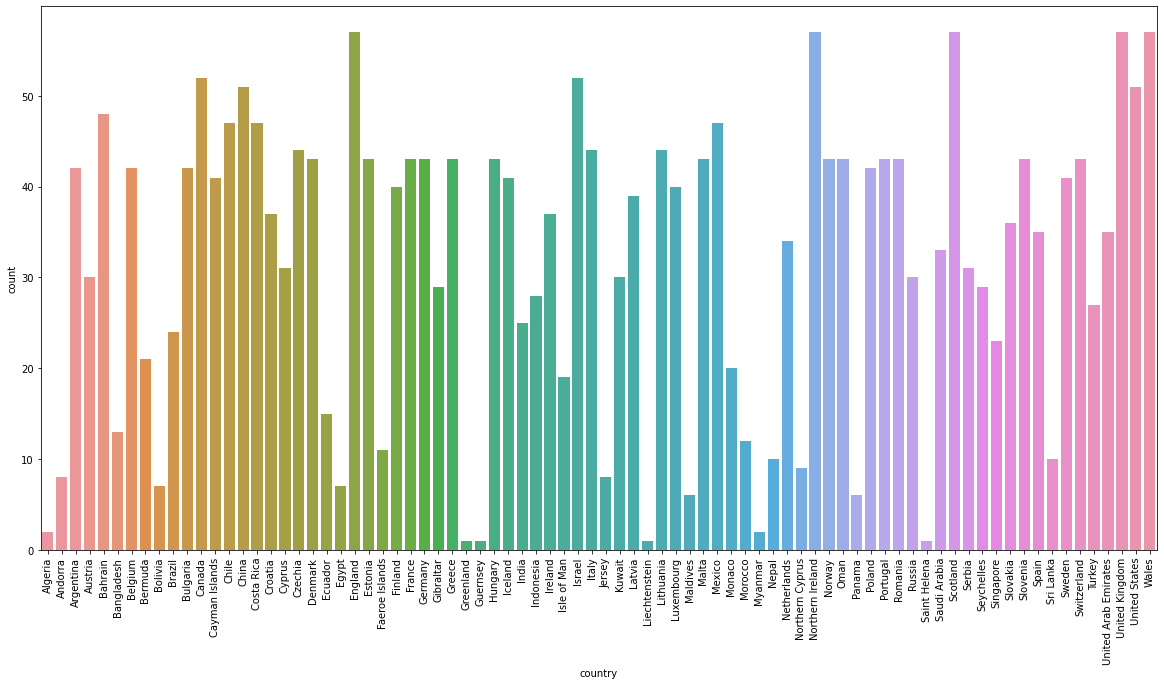

In [88]:
plt.figure(figsize=(20,10))

ax=sns.countplot(x='country',data=data_raw)
ax.tick_params(axis='x',rotation=90)

Проверим, существуют ли дни, когда записи вносились больше 1 раза в стране:

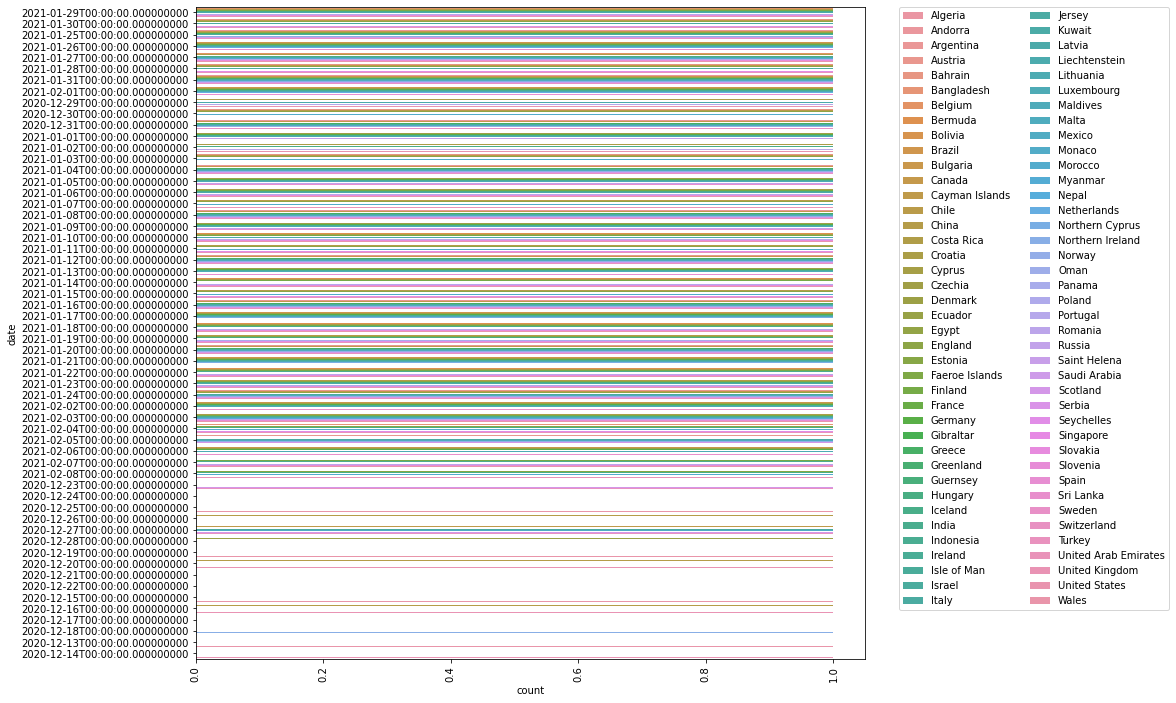

In [89]:
#for country in data_raw['country'].unique():
   # print(country,':')
    #print(data_raw.loc[data_raw['country']==country,]['date'].value_counts())
    #print(data_raw.loc[data_raw['country']==country,]['date'].value_counts().value_counts())
    
plt.figure(figsize=(12,12))

#data_raw['country'].unique()
ax=sns.countplot(y='date',data=data_raw,hue='country') 
ax.tick_params(axis='x',rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,ncol=2)


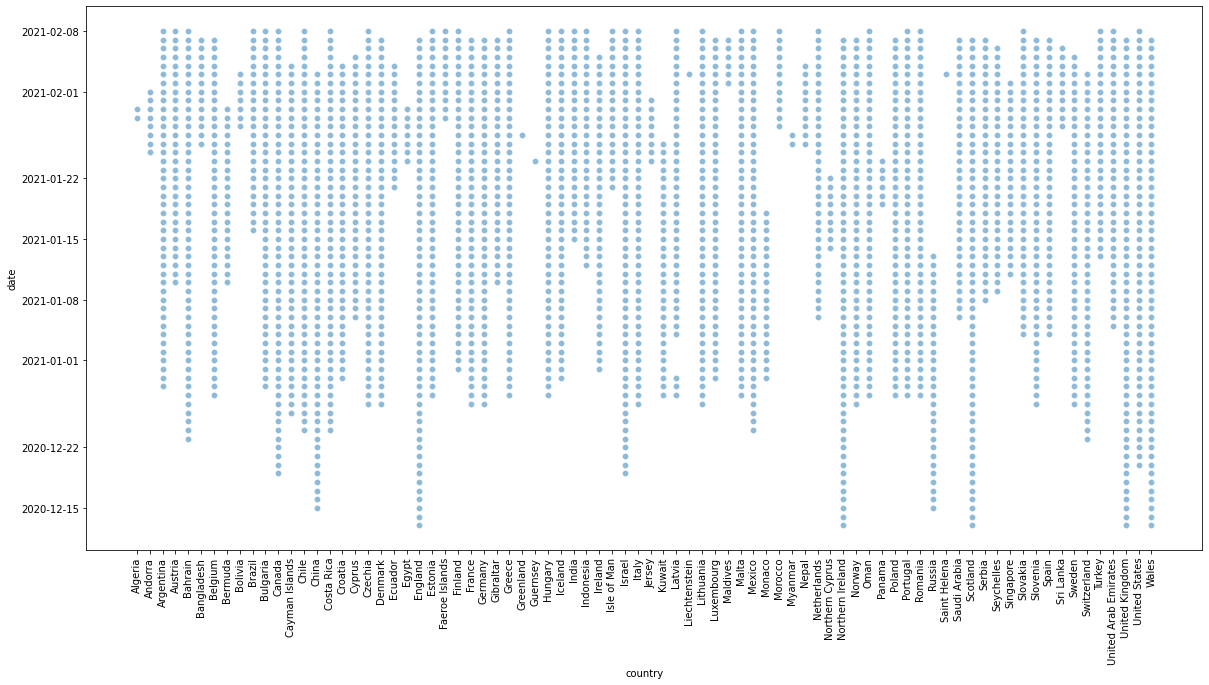

In [90]:
plt.figure(figsize=(20,10))

ax=sns.scatterplot(y='date',x='country',data=data_raw,alpha=0.5) 
ax.tick_params(axis='x',rotation=90)


Получили, что сочетания country-date встречаются по одному разу ==> ни в одной стране из датасета записи не вносились больше, чем 1 раз/день. Следовательно, график выше можно рассматривать как количество дней по странам, когда впринципе вносились данные.

Теперь посмотрим на вакцины:

Разделим вакцины в записях:

Посмотрим нет ли пропущенных значений:


In [91]:
data_raw.isna().sum() 

country                                   0
date                                      0
total_vaccinations                      888
people_vaccinated                      1200
people_fully_vaccinated                1750
daily_vaccinations_raw                 1187
daily_vaccinations                       97
total_vaccinations_per_hundred          888
people_vaccinated_per_hundred          1200
people_fully_vaccinated_per_hundred    1750
daily_vaccinations_per_million           97
vaccines                                  0
dtype: int64

In [92]:
data_raw['vaccines'].unique()

array(['Sputnik V', 'Pfizer/BioNTech',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Pfizer/BioNTech, Sinopharm/Beijing', 'Oxford/AstraZeneca',
       'Moderna, Pfizer/BioNTech', 'Oxford/AstraZeneca, Sinovac',
       'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac', 'Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Covaxin, Oxford/AstraZeneca', 'Sinovac',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V'],
      dtype=object)

Видим, что у столбца с типом вакцин нет пропущенные значения, при этом у некоторых стран перечисленно несколько вакцин через запятую. Это не подходит для обработки, поэтому преобразуем эти в строки в бинарные признаки:

1. Найдём какие вакцины встречаются в таблице

In [117]:
vaccine_types=set()

for unique in data_raw['vaccines'].unique():
    row_types=unique.split(',')
    for elem in row_types:
        if elem not in vaccine_types:
            vaccine_types.add(elem.strip(' '))
vaccine_types

{'Covaxin',
 'Moderna',
 'Oxford/AstraZeneca',
 'Pfizer/BioNTech',
 'Sinopharm/Beijing',
 'Sinopharm/Wuhan',
 'Sinovac',
 'Sputnik V'}

In [111]:
vaccine_types

{'Covaxin',
 'Moderna',
 'Oxford/AstraZeneca',
 'Pfizer/BioNTech',
 'Sinopharm/Beijing',
 'Sinopharm/Wuhan',
 'Sinovac',
 'Sputnik V'}

['Covaxin',
 'Moderna',
 'Oxford/AstraZeneca',
 'Pfizer/BioNTech',
 'Sinopharm/Beijing',
 'Sinopharm/Wuhan',
 'Sinovac',
 'Sputnik V']

2. Сделаем из этих вакцин столбцы и заполним их нулями

In [118]:
for vaccine in vaccine_types:
    data_raw[vaccine]=0
data_raw.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,Sputnik V,Sinovac,Oxford/AstraZeneca,Moderna,Pfizer/BioNTech,Sinopharm/Wuhan,Covaxin,Sinopharm/Beijing
0,Algeria,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,0,0,0,0,0,0,0,0
1,Algeria,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,0,0,0,0,0,0,0,0
2,Andorra,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,0,0,0,0,0,0,0,0
3,Andorra,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,0,0,0,0,0,0,0,0
4,Andorra,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,0,0,0,0,0,0,0,0


3. Проверим к каким типам относятся только что созданные признаки

In [95]:
for i in data_raw.loc[:,'vaccines':].columns:
   print('{0:50} {1}'.format(i,data_raw[i].dtype) )

vaccines                                           object
Sputnik V                                          int64
Sinovac                                            int64
Oxford/AstraZeneca                                 int64
Moderna                                            int64
Pfizer/BioNTech                                    int64
Sinopharm/Wuhan                                    int64
Covaxin                                            int64
Sinopharm/Beijing                                  int64


4. Теперь заполним эти признаки:
    * Проходим по всем строкам и разбираем какие есть вакцины в каждой строке. Ставим 1 в соответсвующий столбец если такая вакцина присутстует в строке.

In [96]:
for i in range(data_raw.shape[0]):
    country_unique_vaccines=data_raw.iloc[i]['vaccines'].split(',')
    for vaccine in country_unique_vaccines:
        data_raw.loc[i,vaccine.strip(' ')]=1
data=data_raw.drop(columns=['vaccines'],axis=1)
data

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,Sputnik V,Sinovac,Oxford/AstraZeneca,Moderna,Pfizer/BioNTech,Sinopharm/Wuhan,Covaxin,Sinopharm/Beijing
0,Algeria,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,1,0,0,0,0,0,0,0
1,Algeria,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,1,0,0,0,0,0,0,0
2,Andorra,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,0,0,0,0,1,0,0,0
3,Andorra,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,0,0,0,0,1,0,0,0
4,Andorra,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,Wales,2021-02-03,491786.0,490570.0,1216.0,28129.0,22149.0,15.60,15.56,0.04,7025.0,0,0,1,0,1,0,0,0
2551,Wales,2021-02-04,524677.0,523042.0,1635.0,32891.0,23101.0,16.64,16.59,0.05,7327.0,0,0,1,0,1,0,0,0
2552,Wales,2021-02-05,559468.0,556997.0,2471.0,34791.0,25788.0,17.74,17.67,0.08,8179.0,0,0,1,0,1,0,0,0
2553,Wales,2021-02-06,592228.0,589622.0,2606.0,32760.0,26854.0,18.78,18.70,0.08,8517.0,0,0,1,0,1,0,0,0


In [121]:
#count_vaccines={vaccine:data_raw.loc[:,vaccine].sum() for vaccine in data_raw.loc[:,'Sinopharm/Wuhan':].columns}
count_vaccines=[[vaccine,data.loc[:,vaccine].sum()] for vaccine in data.loc[:,vaccine_types].columns]
count_vaccines

#ax.tick_params(axis='x',rotation=90)

[['Sputnik V', 147],
 ['Sinovac', 186],
 ['Oxford/AstraZeneca', 1093],
 ['Moderna', 969],
 ['Pfizer/BioNTech', 2229],
 ['Sinopharm/Wuhan', 86],
 ['Covaxin', 25],
 ['Sinopharm/Beijing', 213]]

Наглядно оценим, какова частота использования каждой вакцины от общего числа вакцинаций. Результат представим на pie-диаграмме

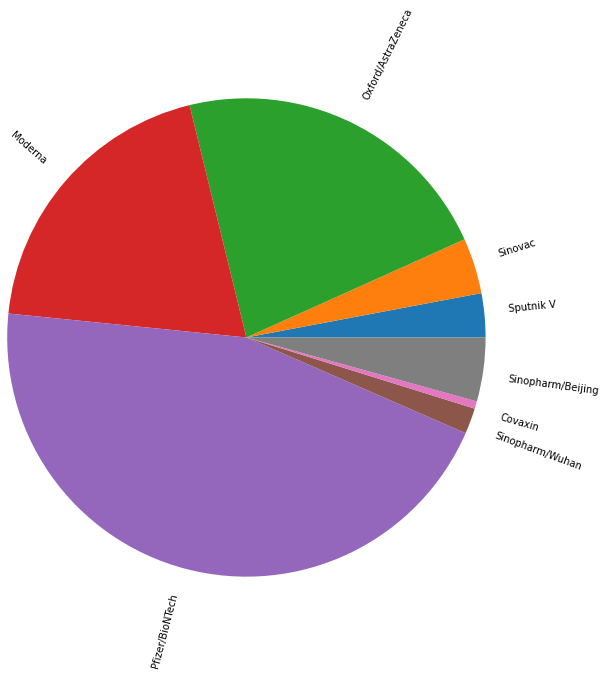

In [122]:
names=[vaccine[0] for vaccine in count_vaccines]
counts=[vaccine[1] for vaccine in count_vaccines]


plt.pie(counts,labels=names,radius=2.75,rotatelabels=True)
plt.show()

Посмотрим на:
*   количество стран, где используется каждая из представленных вакцин (топ вакцин по использованию в странах, согласно данным),
*   распределение количества вакцин, используемое странами

1.

In [123]:
number_of_countries_per_vaccine={}

for vaccine in data.loc[:,vaccine_types].columns:
    number_of_countries_per_vaccine.update({vaccine:len(data.loc[data[vaccine]==1]['country'].unique())})

number_of_countries_per_vaccine

{'Sputnik V': 6,
 'Sinovac': 6,
 'Oxford/AstraZeneca': 32,
 'Moderna': 24,
 'Pfizer/BioNTech': 62,
 'Sinopharm/Wuhan': 2,
 'Covaxin': 1,
 'Sinopharm/Beijing': 7}

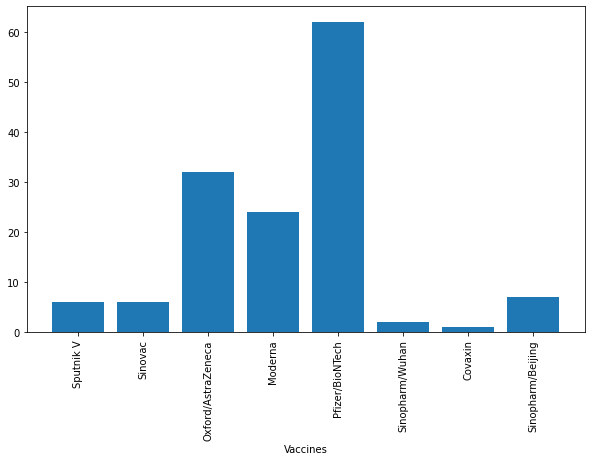

In [100]:
fig = plt.figure(figsize = (10, 6))
plt.bar(range(len(number_of_countries_per_vaccine)), list(number_of_countries_per_vaccine.values()), tick_label=list(number_of_countries_per_vaccine.keys()))
plt.xticks(rotation='vertical')
plt.xlabel('Vaccines')
pass

2.

In [124]:
vaccine_usage_per_country={country:0 for country in data['country'].unique()}
for country in data['country'].unique():
    df=data.loc[data['country']==country]
    for vaccine in df.loc[:,vaccine_types]:
        if sum(df[vaccine])!=0:
            vaccine_usage_per_country[country]+=1

#print(vaccine_usage_per_country)


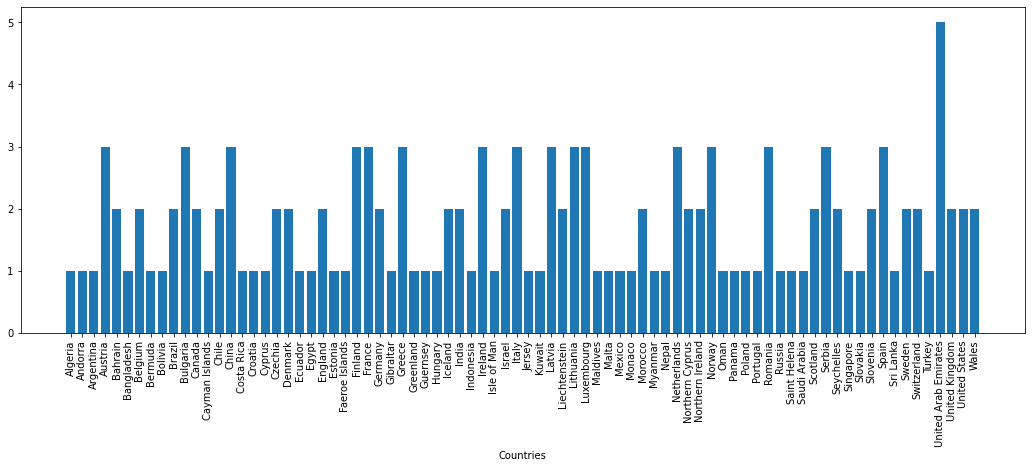

In [125]:
fig = plt.figure(figsize = (18, 6))
plt.bar(range(len(vaccine_usage_per_country)), list(vaccine_usage_per_country.values()), tick_label=list(vaccine_usage_per_country.keys()))
plt.xlabel('Countries')
plt.xticks(rotation='vertical')
pass

Посмотрим на распределение заполненности колонки daily_vaccinations (число вакцинаций в день) и people_vaccinated_per_hundred (доля иммунизированного населения) по странам

In [103]:
df=data.loc[:,['daily_vaccinations','people_vaccinated_per_hundred']]
df

,daily_vaccinations,people_vaccinated_per_hundred
0,NaN,NaN
1,30.0,NaN
2,NaN,0.75
3,66.0,NaN
4,66.0,NaN
...,...,...
2550,22149.0,15.56
2551,23101.0,16.59
2552,25788.0,17.67
2553,26854.0,18.70


In [104]:
df.isna().sum()

daily_vaccinations                 97
people_vaccinated_per_hundred    1200
dtype: int64

уберем из рассмотрения страны, где нет данных по people_vaccinated_per_hundred, так как мы хотим посмотреть на последние актуальные цифры по этому столбцу

In [105]:
rows_to_drop=df[df['people_vaccinated_per_hundred'].isna()].index
df=df.drop(rows_to_drop)
df

,daily_vaccinations,people_vaccinated_per_hundred
2,NaN,0.75
9,66.0,1.34
32,11586.0,0.54
33,11704.0,0.55
34,11263.0,0.56
...,...,...
2550,22149.0,15.56
2551,23101.0,16.59
2552,25788.0,17.67
2553,26854.0,18.70


посмотрим в какой последний день страны вносили данные, помним, что крайний день датасета: 21-02-08

In [106]:
last_updates={country: data.loc[data['country']==country]['date'].max()  for country in data['country'].unique()}
last_updates

{'Algeria': Timestamp('2021-01-30 00:00:00'),
 'Andorra': Timestamp('2021-02-01 00:00:00'),
 'Argentina': Timestamp('2021-02-08 00:00:00'),
 'Austria': Timestamp('2021-02-08 00:00:00'),
 'Bahrain': Timestamp('2021-02-08 00:00:00'),
 'Bangladesh': Timestamp('2021-02-07 00:00:00'),
 'Belgium': Timestamp('2021-02-07 00:00:00'),
 'Bermuda': Timestamp('2021-01-30 00:00:00'),
 'Bolivia': Timestamp('2021-02-03 00:00:00'),
 'Brazil': Timestamp('2021-02-08 00:00:00'),
 'Bulgaria': Timestamp('2021-02-08 00:00:00'),
 'Canada': Timestamp('2021-02-08 00:00:00'),
 'Cayman Islands': Timestamp('2021-02-04 00:00:00'),
 'Chile': Timestamp('2021-02-08 00:00:00'),
 'China': Timestamp('2021-02-03 00:00:00'),
 'Costa Rica': Timestamp('2021-02-08 00:00:00'),
 'Croatia': Timestamp('2021-02-04 00:00:00'),
 'Cyprus': Timestamp('2021-02-05 00:00:00'),
 'Czechia': Timestamp('2021-02-08 00:00:00'),
 'Denmark': Timestamp('2021-02-07 00:00:00'),
 'Ecuador': Timestamp('2021-02-04 00:00:00'),
 'Egypt': Timestamp('2021

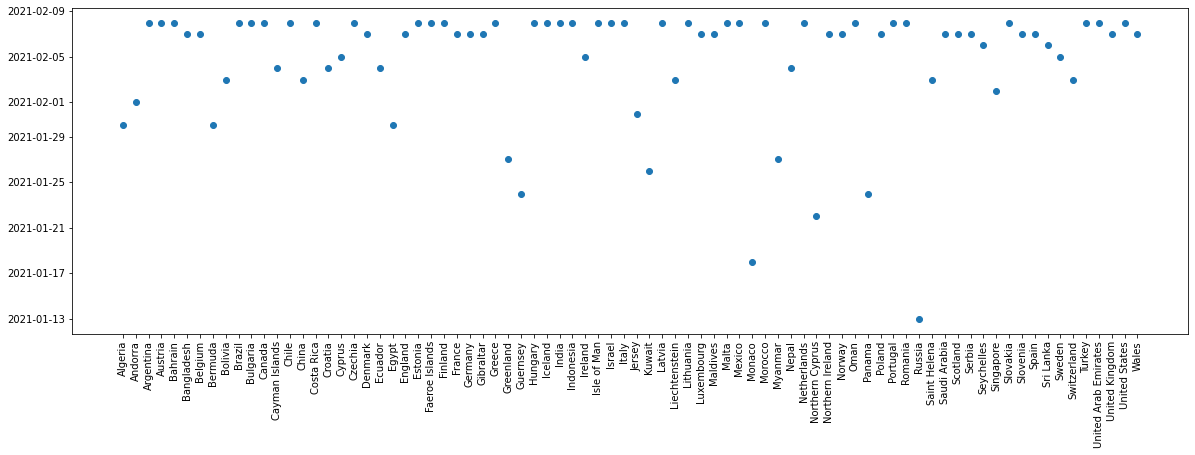

In [107]:
plt.figure(figsize=(20,6))
plt.scatter(x=last_updates.keys(),y=last_updates.values())
plt.xticks(rotation='vertical')
pass

посмотрим на долю вакцинированных по странам, согласно последним данным:

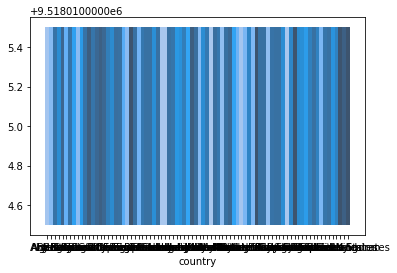

In [108]:
sns.histplot(data=data,x='country',y=data['people_fully_vaccinated'].max())
pass

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Andorra'),
  Text(2, 0, 'Argentina'),
  Text(3, 0, 'Austria'),
  Text(4, 0, 'Bahrain'),
  Text(5, 0, 'Bangladesh'),
  Text(6, 0, 'Belgium'),
  Text(7, 0, 'Bermuda'),
  Text(8, 0, 'Bolivia'),
  Text(9, 0, 'Brazil'),
  Text(10, 0, 'Bulgaria'),
  Text(11, 0, 'Canada'),
  Text(12, 0, 'Cayman Islands'),
  Text(13, 0, 'Chile'),
  Text(14, 0, 'China'),
  Text(15, 0, 'Costa Rica'),
  Text(16, 0, 'Croatia'),
  Text(17, 0, 'Cyprus'),
  Text(18, 0, 'Czechia'),
  Text(19, 0, 'Denmark'),
  Text(20, 0, 'Ecuador'),
  Text(21, 0, 'Egypt'),
  Text(22, 0, 'England'),
  Text(23, 0, 'Estonia'),
  Text(24, 0, 'Fa

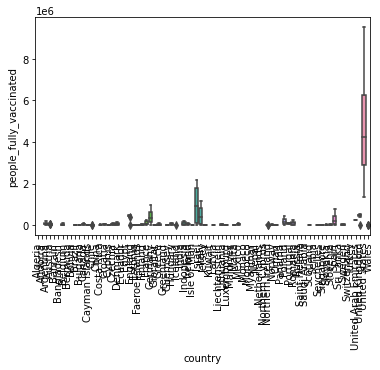

In [109]:
sns.boxplot(x='country',y='people_fully_vaccinated',data=data)
plt.xticks(rotation='vertical')

В лидерах Израиль, Гибралтар и Сейшеллы. 

Теперь посмотрим на среднее и максимум по daily_vaccinations. Здесь не нужно чистить строки с пустыми значениями в соответствующей колонке, тк мы смотрим статистики на всем диапазоне дат

Из графика видно, что самая быстрая скорость вакцинирования у США И Китая. Остальные страны проводят вакцнацию существенно медленнее.

Видно, что США является абсолютным лидером, далее идет Китай, прочие страны с существенным отрывом. 

Исследование по странам мы провели, теперь увеличим масштаб, будем смотреть по частям света. Для этого скачаем данные с параметрами стран, нас интересует к какой части света страна относится. Все пустые строки, лишние столбцы сразу удаляем.

Совместим две имеющиеся таблицы. Пропуски в столбце с континентом - это части Европы (Англия разделенная, острова рядом с ней).

По последней строке для каждой из стран смотрим сколько на каждом континенте вакцинируемых стран